In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2023-05-22 01:01:37.630742: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 01:01:38.253004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-22 01:01:39.101140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-22 01:01:39.154597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-22 01:01:39.154652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_exec

In [2]:
import tensorflow as tf
class Model_1():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,3,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        # Declarando la arquitectura
        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 3])

        layer=0
        out = tf.add(out, 1e-8)
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_1()

/home/daniel/miniconda3/envs/tf/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


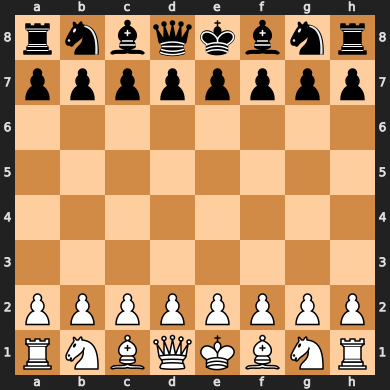

In [3]:
board=chess.Board()
board

In [5]:
base_name = '../weights/tf_weights-full.0.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

/device:GPU:0


2023-05-22 01:01:56.750467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-22 01:01:57.983039: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-22 01:01:58.021990: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-22 01:01:58.022055: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-22 01:01:58.056839: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-22 01:01:58.056954: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:317] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

Move.from_uci('c2c4')

In [6]:
moves,values=deepbot.get_move_values(board)

In [7]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [8]:
values

array([0.7434984 , 0.7633909 , 0.7839156 , 0.75244904, 0.72793436,
       0.7711617 , 0.68836915, 0.63104516, 0.6398492 , 0.7735336 ,
       0.7824909 , 0.80032784, 0.69550085, 0.7087093 , 0.6936632 ,
       0.66009265, 0.78949976, 0.8428718 , 0.7047199 , 0.7351173 ],
      dtype=float32)

In [9]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('c2c4'), 0.8428717851638794],
       [Move.from_uci('a2a3'), 0.8003278374671936],
       [Move.from_uci('d2d4'), 0.7894997596740723],
       [Move.from_uci('b1c3'), 0.7839155793190002],
       [Move.from_uci('b2b3'), 0.7824909090995789],
       [Move.from_uci('c2c3'), 0.7735335826873779],
       [Move.from_uci('g2g3'), 0.771161675453186],
       [Move.from_uci('g1f3'), 0.7633908987045288],
       [Move.from_uci('b1a3'), 0.7524490356445312],
       [Move.from_uci('g1h3'), 0.7434983849525452],
       [Move.from_uci('a2a4'), 0.7351173162460327],
       [Move.from_uci('h2h3'), 0.7279343605041504],
       [Move.from_uci('g2g4'), 0.7087092995643616],
       [Move.from_uci('b2b4'), 0.7047199010848999],
       [Move.from_uci('h2h4'), 0.6955008506774902],
       [Move.from_uci('f2f4'), 0.6936631798744202],
       [Move.from_uci('f2f3'), 0.6883691549301147],
       [Move.from_uci('e2e4'), 0.6600926518440247],
       [Move.from_uci('d2d3'), 0.6398491859436035],
       [Move.

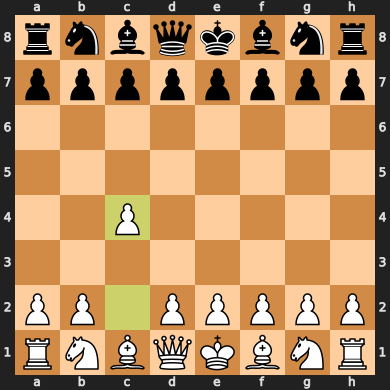

In [10]:
board.push(move)
board

In [11]:
kaufman_test(deepbot)

0.04

In [12]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 1/25 = 0.04 | weighted = 0.49
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 19 & 48 & 0.6170 & 0.7286 & c1b1 & 0.8621  \\
02 & f5d4 & 22 & 39 & 0.4474 & 0.5077 & g6g5 & 0.7458  \\
03 & e1d1 & 4 & 38 & 0.9189 & 0.7094 & f2f7 & 0.7563  \\
04 & b1b2 & 43 & 47 & 0.0870 & 0.2866 & f2b6 & 0.6389  \\
05 & g5c1 & 48 & 48 & 0.0000 & 0.1983 & h7h6 & 0.6083  \\
06 & a3a2 & 26 & 31 & 0.1667 & 0.4142 & a8b8 & 0.6811  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.6451 & g7g5 & 0.8371  \\
08 & h7h6 & 5 & 39 & 0.8947 & 0.1800 & e1d1 & 0.2683  \\
09 & f3e2 & 28 & 35 & 0.2059 & 0.3175 & d2d1 & 0.5829  \\
10 & d5c3 & 34 & 41 & 0.1750 & 0.8353 & g7g5 & 0.9516  \\
11 & g3f5 & 2 & 35 & 0.9706 & 0.7932 & g1h2 & 0.7938  \\
12 & c6d6 & 15 & 41 & 0.6500 & 0.2574 & e7e6 & 0.4464  \\
13 & c3d5 & 1 & 30 & 1.0000 & 0.6727 & c3d5 & 0.6727  \\
14 & b1b2 & 46 & 49 & 0.0625 & 0.4096 & c2c4 & 0.7024  \\
15 & d3f5 & 32 & 51 & 0.3800 & 0.4855 & h6e6 & 0.7777  \\
16 & b3b4 & 6 & 10 & 0.4444 & 0.688

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.728618,c1b1,0.862107,19,48,0.617021
1,f5d4,0.507694,g6g5,0.745761,22,39,0.447368
2,e1d1,0.709361,f2f7,0.756279,4,38,0.918919
3,b1b2,0.286638,f2b6,0.638918,43,47,0.086957
4,g5c1,0.198345,h7h6,0.608254,48,48,0.000000
5,a3a2,0.414205,a8b8,0.681117,26,31,0.166667
6,b7e4,0.645090,g7g5,0.837072,23,33,0.312500
7,h7h6,0.179999,e1d1,0.268301,5,39,0.894737
8,f3e2,0.317455,d2d1,0.582870,28,35,0.205882
9,d5c3,0.835283,g7g5,0.951554,34,41,0.175000


In [13]:
epochs=35
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc'][-1]
    test_acc_model[i-1] = deepbot.history['test']['acc'][-1]


/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0
/device:GPU:0


In [16]:
path = './stockfish_15.1_linux_x64/stockfish-ubuntu-20.04-x86-64'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,epochs)
ssp = np.repeat(ssp,epochs)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.28 | 0.65


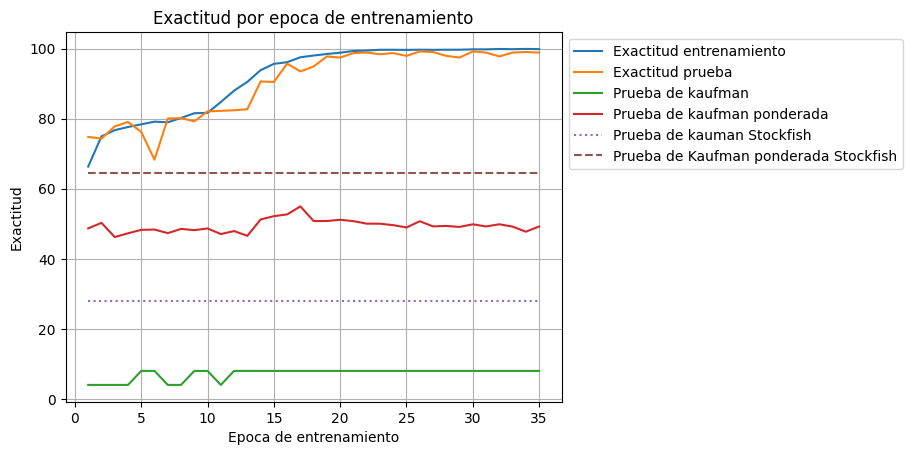

In [17]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [18]:
train_acc_model

array([0.66331744, 0.74951524, 0.7673189 , 0.77630883, 0.78406489,
       0.79164463, 0.78970563, 0.80222106, 0.81561786, 0.81667548,
       0.84769964, 0.88013399, 0.90516484, 0.93865681, 0.95663673,
       0.9613961 , 0.97549796, 0.98043364, 0.98484045, 0.9885422 ,
       0.99330163, 0.99453551, 0.99682707, 0.99682707, 0.9964745 ,
       0.99700338, 0.99665082, 0.99700338, 0.99700338, 0.998061  ,
       0.998061  , 0.99911863, 0.99858981, 0.99929488, 0.99876606])

In [19]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(epochs):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 66.33 & 74.80 & 4.00 & 48.69 \\
02 & 74.95 & 74.33 & 4.00 & 50.27 \\
03 & 76.73 & 77.81 & 4.00 & 46.22 \\
04 & 77.63 & 79.08 & 4.00 & 47.29 \\
05 & 78.41 & 76.23 & 8.00 & 48.27 \\
06 & 79.16 & 68.30 & 8.00 & 48.36 \\
07 & 78.97 & 80.03 & 4.00 & 47.33 \\
08 & 80.22 & 80.19 & 4.00 & 48.55 \\
09 & 81.56 & 79.24 & 8.00 & 48.19 \\
10 & 81.67 & 82.09 & 8.00 & 48.67 \\
11 & 84.77 & 82.25 & 4.00 & 47.08 \\
12 & 88.01 & 82.41 & 8.00 & 47.93 \\
13 & 90.52 & 82.73 & 8.00 & 46.56 \\
14 & 93.87 & 90.65 & 8.00 & 51.24 \\
15 & 95.66 & 90.49 & 8.00 & 52.18 \\
16 & 96.14 & 95.72 & 8.00 & 52.68 \\
17 & 97.55 & 93.50 & 8.00 & 54.97 \\
18 & 98.04 & 94.93 & 8.00 & 50.78 \\
19 & 98.48 & 97.78 & 8.00 & 50.80 \\
20 & 98.85 & 97.46 & 8.00 & 51.15 \\
21 & 99.33 & 98.73 & 8.00 & 50.76 \\
22 & 99.45 & 98.89 & 8.00 & 50.05 \\
23 & 99.68 & 98.42 & 8.00 & 50.03 \\
24 & 99.68 & 98.73 & 8.00 & 4

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.663317,0.748019,0.04,0.486882
2,0.749515,0.743265,0.04,0.502740
3,0.767319,0.778130,0.04,0.462191
4,0.776309,0.790808,0.04,0.472919
5,0.784065,0.762282,0.08,0.482697
6,0.791645,0.683043,0.08,0.483607
7,0.789706,0.800317,0.04,0.473275
8,0.802221,0.801902,0.04,0.485523
9,0.815618,0.792393,0.08,0.481864
10,0.816675,0.820919,0.08,0.486680
